In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import unique

In [2]:
df = pd.read_csv('datasets/kc_house_dataset.csv')

In [3]:
df.shape

(21612, 21)

For fast local machine performance I am going to reduce the dataset size to 1000

In [4]:
df = df.head(1000)

In [5]:
df.shape

(1000, 21)

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
for d_col in df.columns:
    print(d_col, ': ', len(unique(df[d_col])))

id :  992
date :  272
price :  591
bedrooms :  8
bathrooms :  19
sqft_living :  321
sqft_lot :  829
floors :  6
waterfront :  2
view :  5
condition :  5
grade :  9
sqft_above :  291
sqft_basement :  140
yr_built :  114
yr_renovated :  25
zipcode :  69
lat :  896
long :  405
sqft_living15 :  267
sqft_lot15 :  799


Lets drop `null` entities and unnecessary columns `id`, `date` 

In [8]:
df = df.dropna() # dropping null entities
df = df.drop(['id', 'date'], axis=1) # dropping unnecessary column `id` and `date`

Lets find out the best columns for model training using `sklearn ExtraTreesClassifier` 

In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
X = df.iloc[:,1:]  # independent columns
Y = df.iloc[:,0]   # target column i.e price

In [11]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

[0.04476743 0.05585909 0.08025827 0.07943732 0.02697125 0.00167333
 0.01443407 0.03872746 0.04414381 0.07982877 0.04590809 0.07914514
 0.00806429 0.07148525 0.08754776 0.08160455 0.08295326 0.07719087]


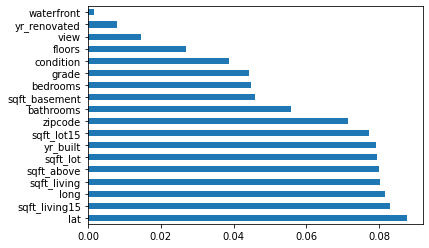

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X)).plot(kind='barh')
plt.show()

I am going to take columns 

```python
[
    'lat', 
    'sqft_living15', 
    'sqft_living', 
    'long',
    'sqft_lot',
    'sqft_above',
    'sqft_lot15',
    'yr_built',
    'zipcode',
    'bathrooms'
]
```
to train my models

In [13]:
X = X[
[
    'lat', 
    'sqft_living15', 
    'sqft_living', 
    'long',
    'sqft_lot',
    'sqft_above',
    'sqft_lot15',
    'yr_built',
    'zipcode',
    'bathrooms'
]]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [18]:
prediction=reg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

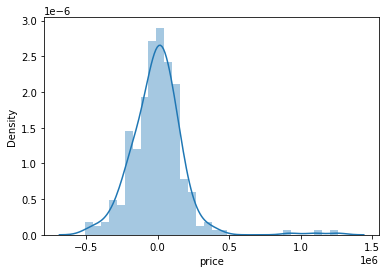

In [19]:
sns.distplot(Y_test-prediction)

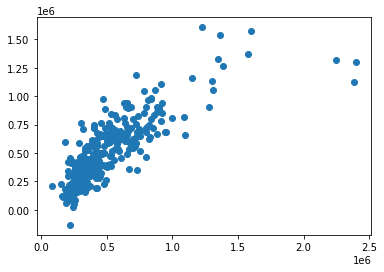

In [20]:
plt.scatter(Y_test, prediction)

In [21]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction})

In [22]:
compare.head()

,Actual,Predicted
993,253000,223911.956564
859,166600,113805.523668
298,404000,556711.686903
553,261000,170746.741698
672,664000,695800.479106


In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(Y_test, prediction)

0.6516628503372464

In [25]:
X.columns

Index(['lat', 'sqft_living15', 'sqft_living', 'long', 'sqft_lot', 'sqft_above',
       'sqft_lot15', 'yr_built', 'zipcode', 'bathrooms'],
      dtype='object')